In [27]:
import numpy as np
from RL import grid_world_mdp
from RL import RL
from RL import grid_display

In [28]:
grid_rows = 4
grid_cols = 4
actions = 4
terminal_states = [0, 15]

# Creating Grid World MDP

## - Default is to have -1 reward for each move and no noise meaning if an action is chosen it will be executed unless that actions is not a legal move, in which case the move will lead you to stay in the same grid square.

In [29]:
mdp = grid_world_mdp(grid_rows, grid_cols, actions, terminal_states)
rl = RL(mdp)

# Iterative Policy Evaluation Under Random Policy

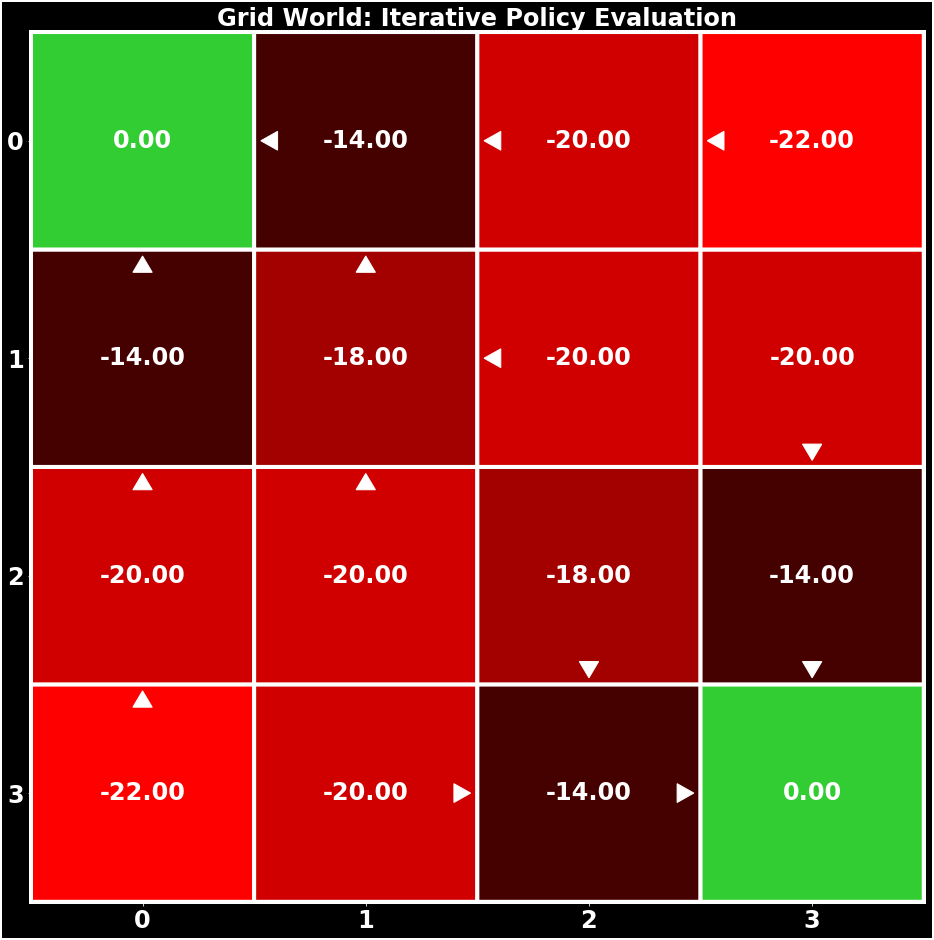

In [30]:
rl.iterative_policy_evaluation()

display = grid_display(rl, title='Grid World: Iterative Policy Evaluation')
display.show_values()

# Policy Iteration to find optimal policy and the value function under the optimal policy

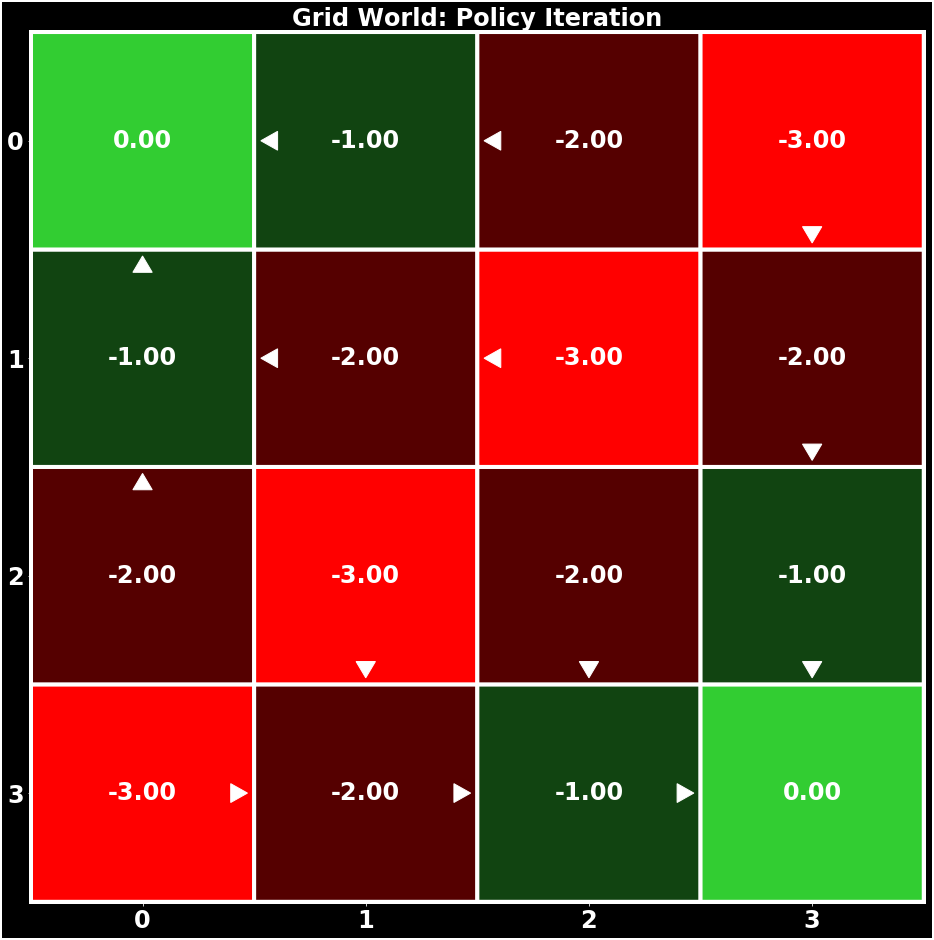

In [31]:
rl.policy_iteration()

display = grid_display(rl, title='Grid World: Policy Iteration')
display.show_values()

# Value Iteration

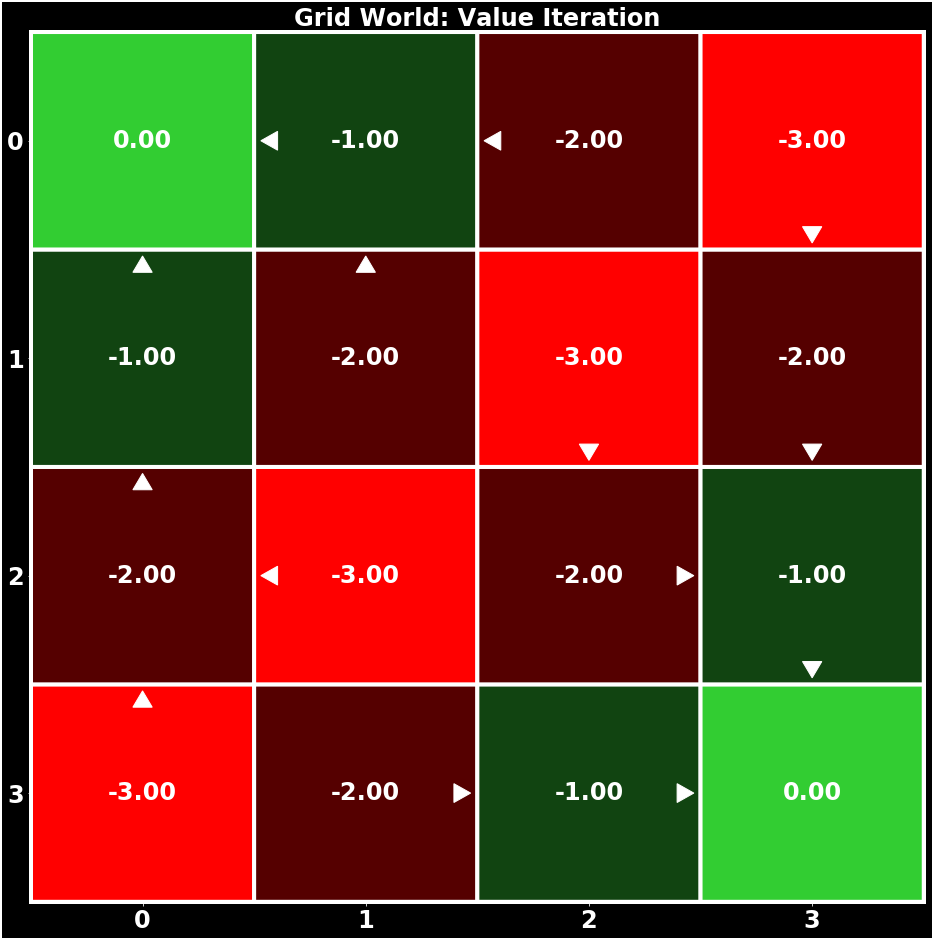

In [32]:
rl.value_iteration()

display = grid_display(rl, title='Grid World: Value Iteration')
display.show_values()

# One step temporal difference 

# - Evaluating the value function for the optimal policy from earlier using one step temporal difference.

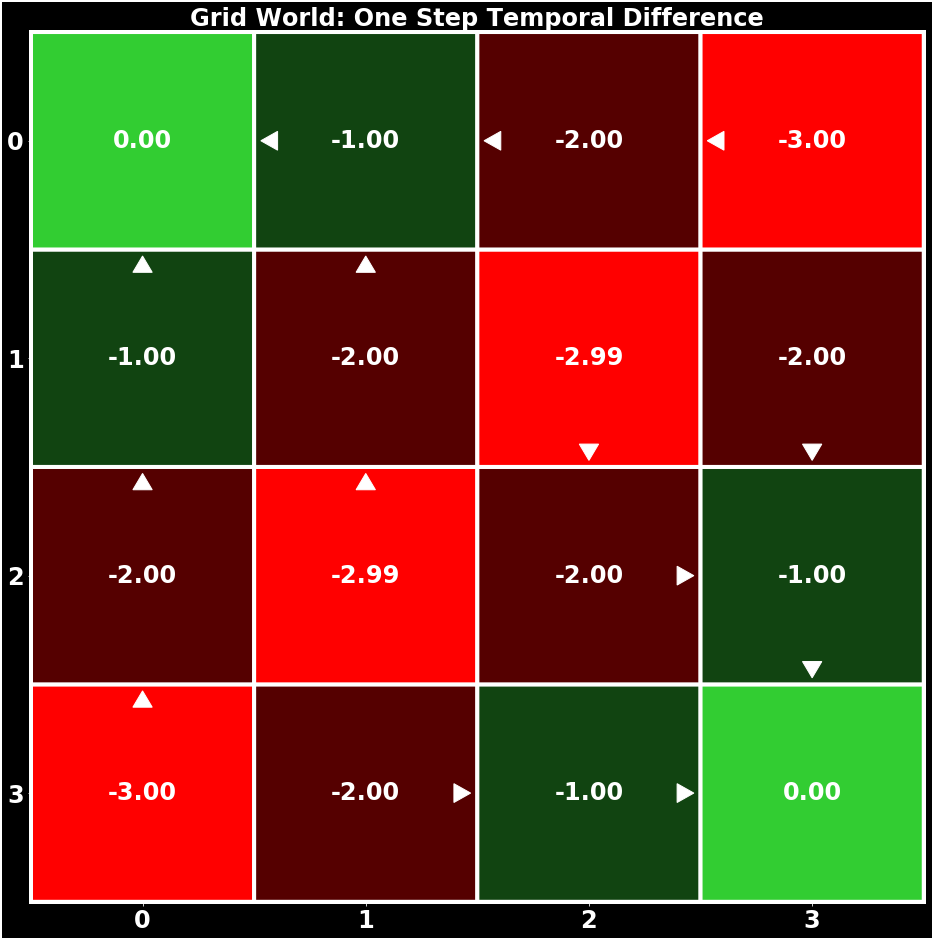

In [35]:
rl.one_step_temporal_difference()

display = grid_display(rl, title='Grid World: One Step Temporal Difference')
display.show_values()

# Q-Value Iteration

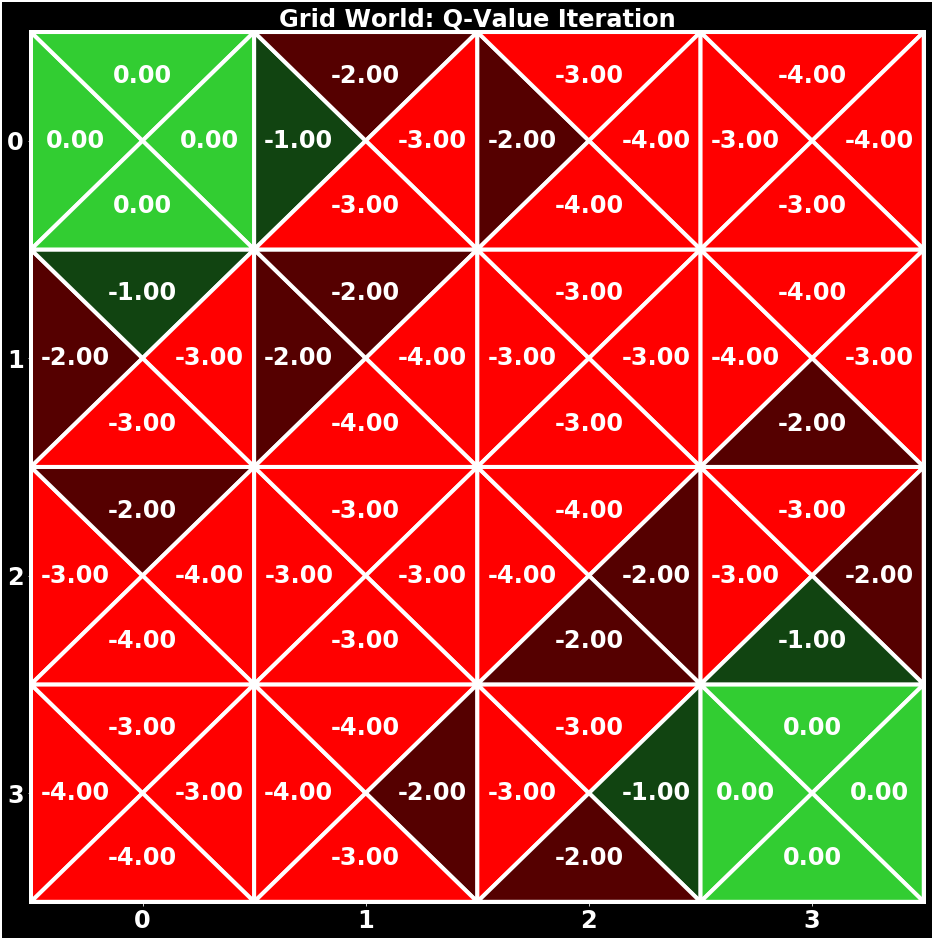

In [36]:
rl.q_value_iteration()
display = grid_display(rl, title='Grid World: Q-Value Iteration')

display.show_q_values()

# SARSA

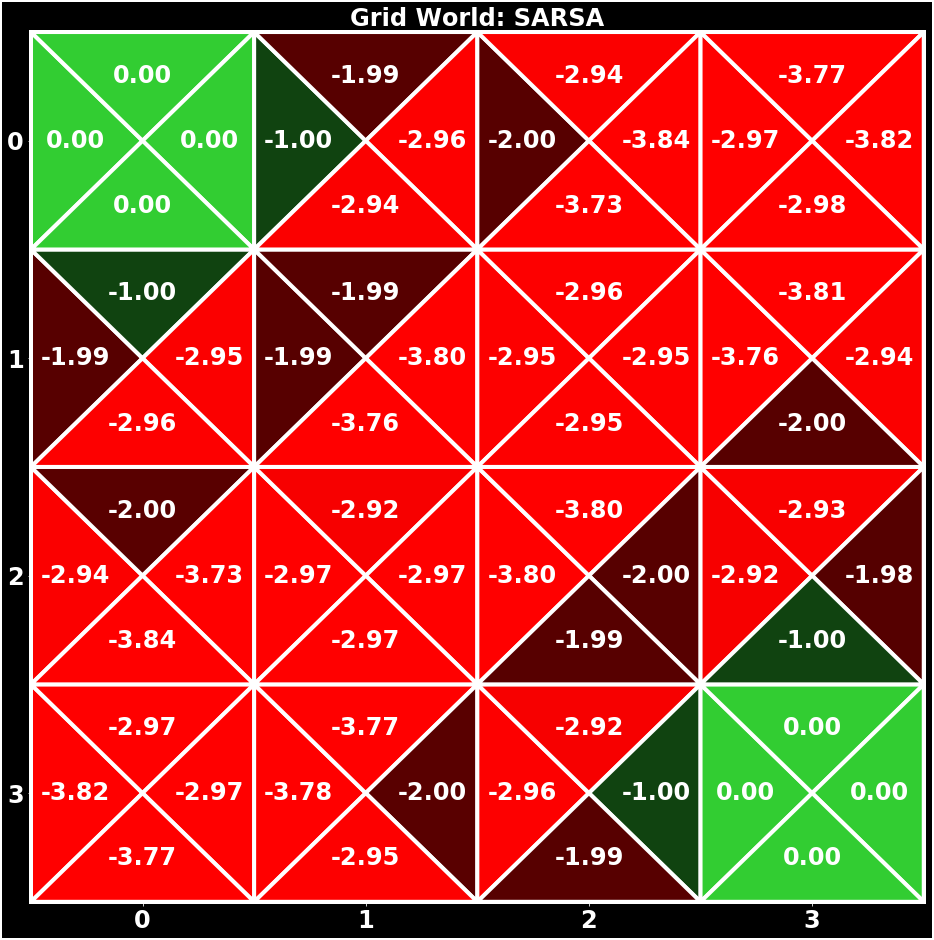

In [38]:
rl.sarsa()
display = grid_display(rl, title='Grid World: SARSA')

display.show_q_values()

# Q-Learning

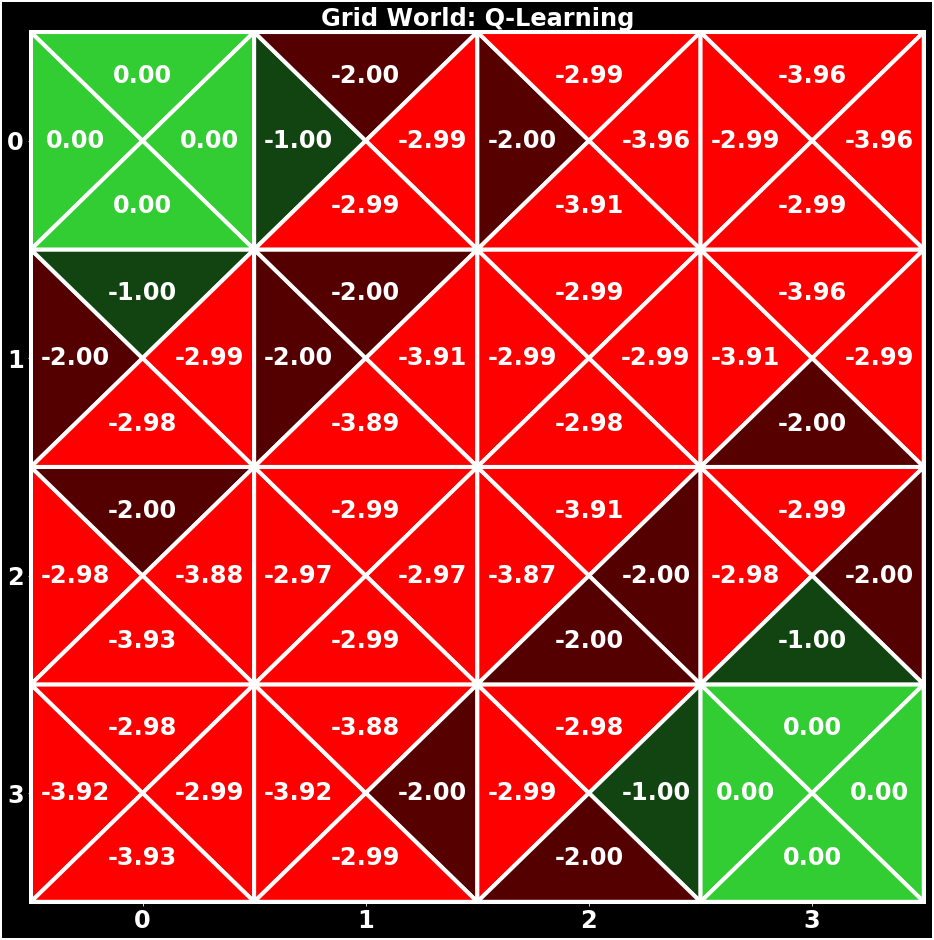

In [39]:
rl.q_learning()
display = grid_display(rl, title='Grid World: Q-Learning')

display.show_q_values()

# Creating a Noisy Reward MDP.

In [41]:
mdp = grid_world_mdp(grid_rows, grid_cols, actions, terminal_states, prob_noise=.5, reward_noise=.5)
rl = RL(mdp)

# Risk Sensitive Q Learning

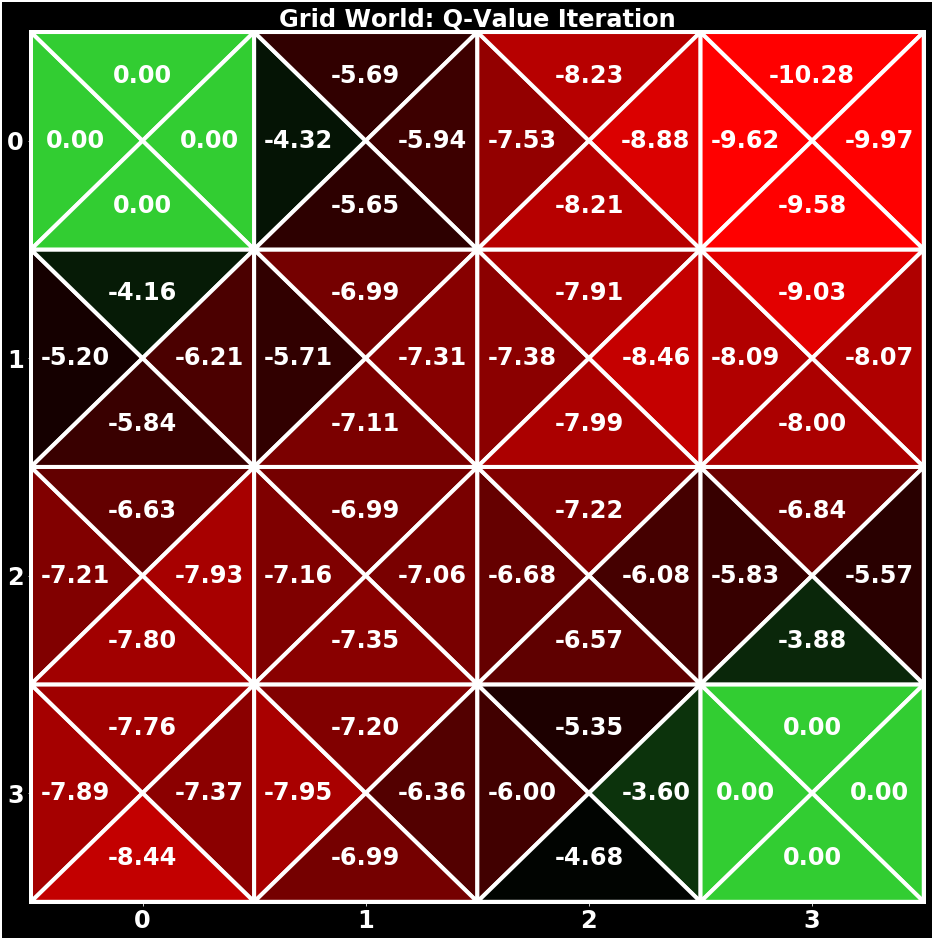

In [69]:
rl.q_value_iteration()
display = grid_display(rl, title='Grid World: Q-Value Iteration')
display.show_q_values()

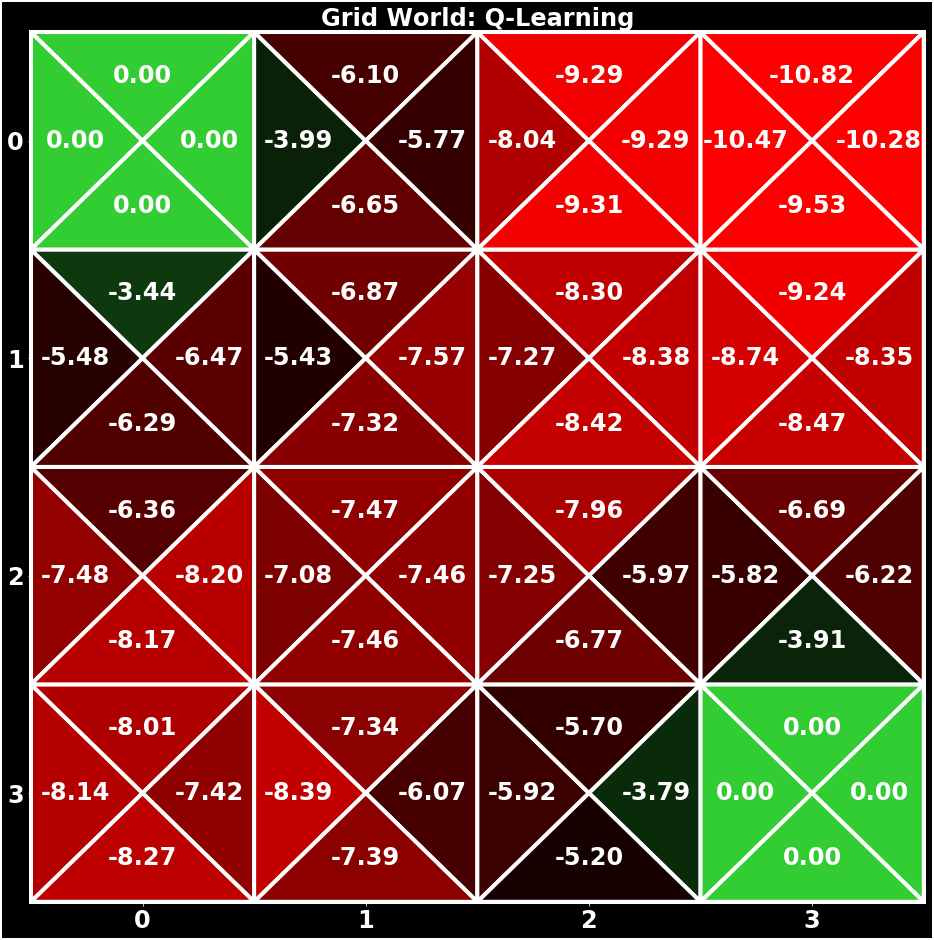

In [74]:
rl.q_learning(policy_strategy='e-greedy', alpha=.05, epsilon=.05, num_episodes=10000)
display = grid_display(rl, title='Grid World: Q-Learning')
display.show_q_values()

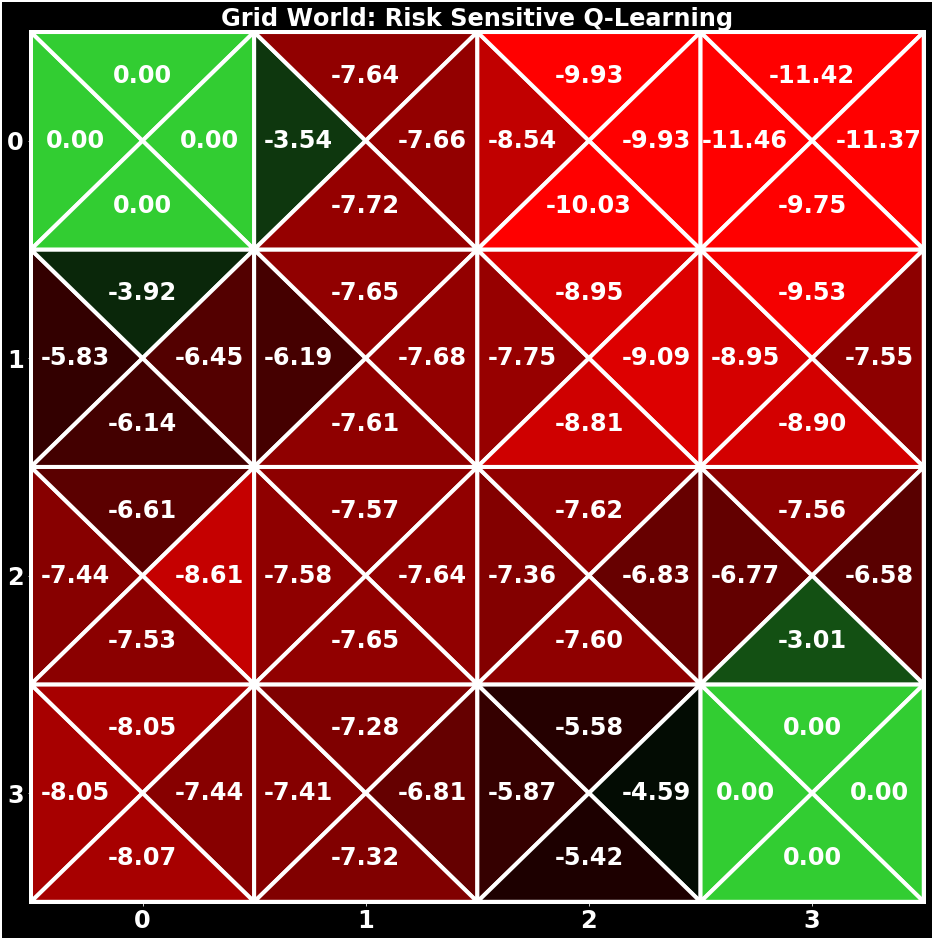

In [77]:
rl.risk_q_learning(policy_strategy='e-greedy', alpha=.1, epsilon=.05, rho_minus=1, rho_plus=1, num_episodes=10000)
display = grid_display(rl, title='Grid World: Risk Sensitive Q-Learning', savefig=True)
display.show_q_values()

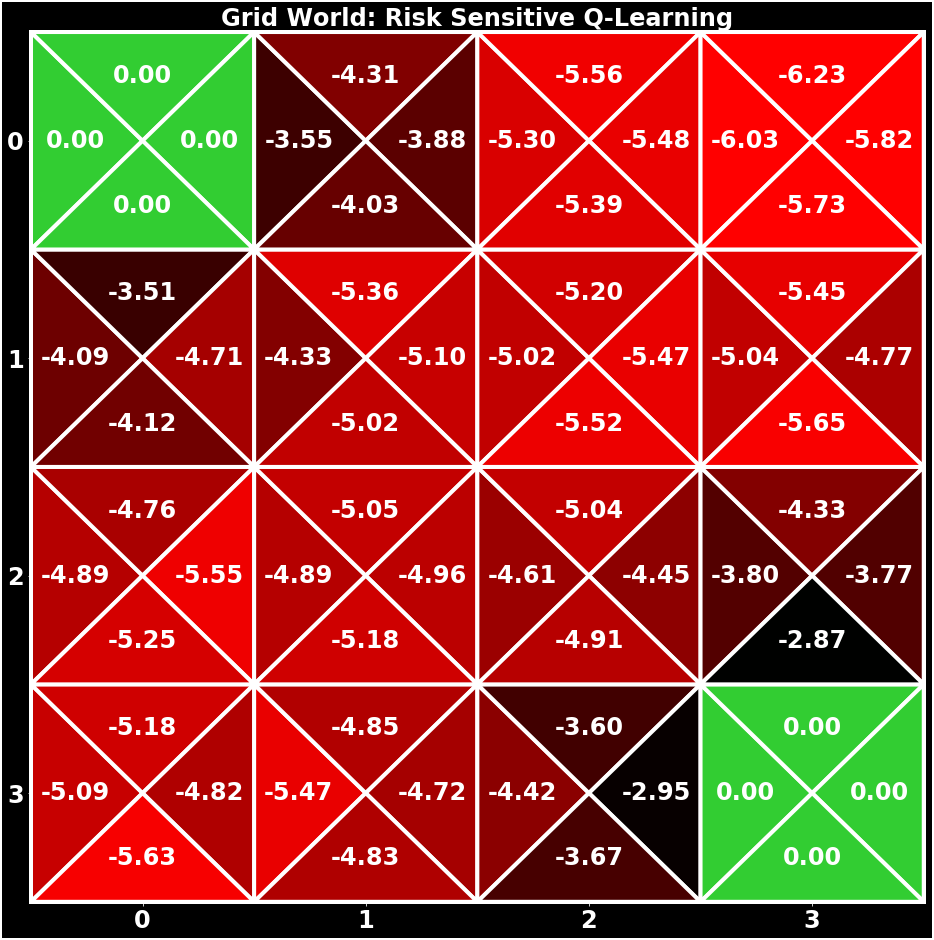

In [78]:
rl.risk_q_learning(rho_minus=1.5, rho_plus=1.5, num_episodes=10000)
display = grid_display(rl, title='Grid World: Risk Sensitive Q-Learning', savefig=True)
display.show_q_values()

# Expected Utility Q Learning

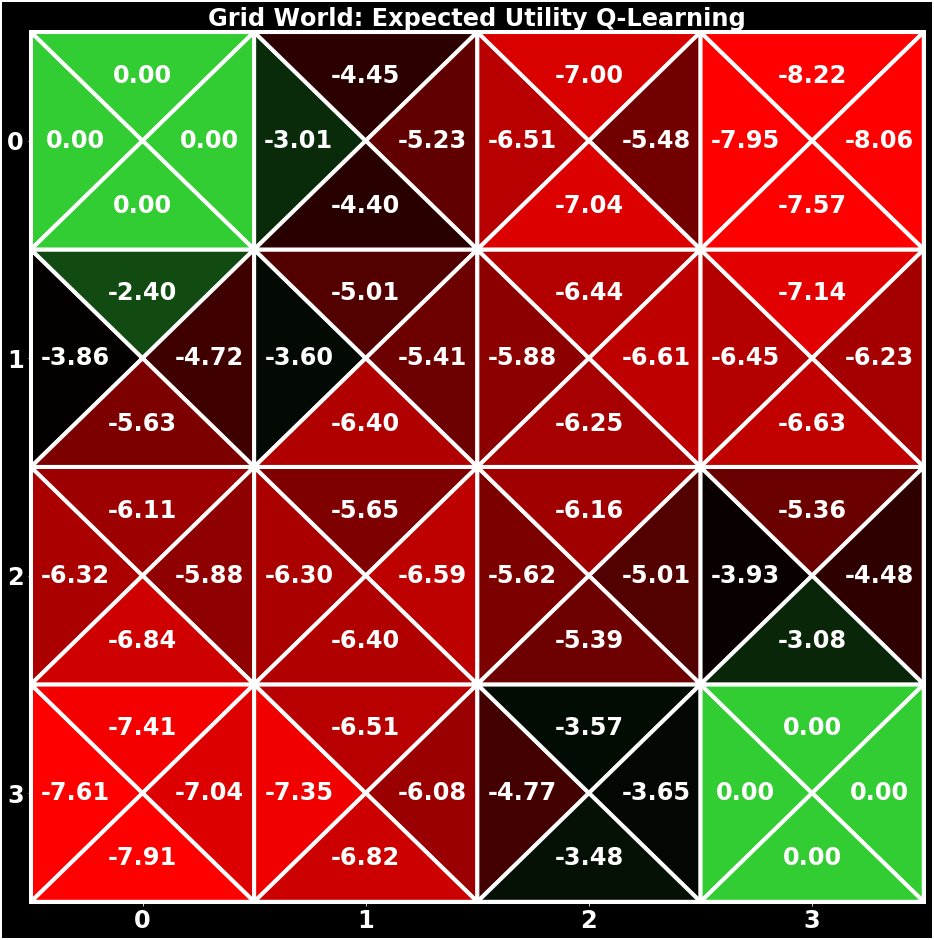

In [79]:
rl.eu_q_learning(alpha=.1, tau=100, util_choice='prospect', rho_minus=.5, rho_plus=.5)
display = grid_display(rl, title='Grid World: Expected Utility Q-Learning', savefig=True)
display.show_q_values()